In [14]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv("rsv.csv",parse_dates=['Date'], index_col='Date')
data.head()
data.tail()

,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
Date,,,,,,,,,,,
01-08-2023,156.887002,83.752002,267.834492,203.272500,525.011484,60.765498,67.701499,55.121499,45.963999,5.5670,253.242500
02-08-2023,154.289004,83.128496,263.523496,200.669492,523.686992,59.970498,66.334502,53.952002,44.764502,5.4840,250.274004
03-08-2023,153.797998,82.547998,262.218496,198.324492,520.623516,59.732998,66.022002,53.876001,44.502500,5.3865,248.260508
04-08-2023,153.284004,82.782500,262.520508,199.885508,520.506484,60.105000,66.228999,53.825000,44.191001,5.3915,250.573496
07-08-2023,153.909004,83.102500,262.663008,200.225996,520.725000,60.290498,66.221499,54.018999,43.927998,5.4230,251.318008


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2854 non-null   object 
 1   Auto         2854 non-null   float64
 2   CNXcons      2854 non-null   float64
 3   CNXenergy    2854 non-null   float64
 4   NiftFinServ  2854 non-null   float64
 5   NiftyFMCG    2854 non-null   float64
 6   CNXInfra     2854 non-null   float64
 7   Metal        2854 non-null   float64
 8   PSE          2854 non-null   float64
 9   PSU          2854 non-null   float64
 10  Reality      2854 non-null   float64
 11  Service      2854 non-null   float64
dtypes: float64(11), object(1)
memory usage: 267.7+ KB


In [17]:
data.isnull().sum()

Date           0
Auto           0
CNXcons        0
CNXenergy      0
NiftFinServ    0
NiftyFMCG      0
CNXInfra       0
Metal          0
PSE            0
PSU            0
Reality        0
Service        0
dtype: int64

In [18]:
data.describe()

,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
count,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000,2854.000000
mean,86.142660,44.636519,137.351648,103.835408,265.272981,33.579592,33.294723,34.138560,29.459996,2.728753,140.155718
std,27.307862,17.294684,60.422867,47.798916,96.394054,9.308230,13.572733,6.345849,6.961535,0.973832,58.912853
min,33.561001,16.885800,68.757998,33.699399,101.039502,18.961500,14.956000,20.121500,10.872000,1.282500,56.292998
25%,69.166625,32.811625,83.584753,64.541876,192.481758,26.859625,23.979249,29.076376,24.885250,2.020125,97.385249
50%,85.488750,44.633501,128.522749,99.574751,258.992754,31.619750,28.863500,34.537749,29.947750,2.466000,129.571748
75%,107.460122,51.681249,162.077373,142.361377,314.412495,35.231125,37.134750,38.753625,34.113374,3.157750,172.926255
max,157.655996,85.000000,290.460996,205.843496,542.396992,61.153501,69.057998,55.121499,46.205498,5.667500,257.888008


In [19]:
data_list=['Auto','CNXcons','CNXenergy','NiftFinServ','NiftyFMCG','CNXInfra','Metal','PSE','PSU','Reality','Service']
skewness=data[data_list].skew()
print(skewness)

Auto          -0.034960
CNXcons        0.428428
CNXenergy      0.849739
NiftFinServ    0.442807
NiftyFMCG      0.580479
CNXInfra       1.003990
Metal          1.068050
PSE            0.270082
PSU           -0.362940
Reality        1.009994
Service        0.548413
dtype: float64


In [20]:
data1=data.iloc[:,1:12] 
data1.skew()

Auto          -0.034960
CNXcons        0.428428
CNXenergy      0.849739
NiftFinServ    0.442807
NiftyFMCG      0.580479
CNXInfra       1.003990
Metal          1.068050
PSE            0.270082
PSU           -0.362940
Reality        1.009994
Service        0.548413
dtype: float64

In [44]:
data1.kurtosis()

Auto          -0.637760
CNXcons       -0.698409
CNXenergy     -0.423515
NiftFinServ   -1.022826
NiftyFMCG     -0.259876
CNXInfra       0.027510
Metal         -0.007010
PSE           -0.383724
PSU            0.026328
Reality        0.161978
Service       -0.881682
dtype: float64

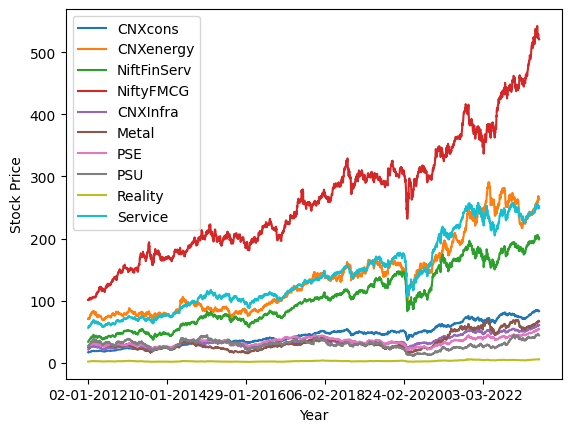

In [32]:
data.iloc[:,1:12].plot()
plt.xlabel('Year')
plt.ylabel('Stock Price')

plt.show()

In [23]:
date=data.iloc[:,0]
date.head()

0    02-01-2012
1    03-01-2012
2    04-01-2012
3    05-01-2012
4    06-01-2012
Name: Date, dtype: object

In [24]:
cmp1=data.iloc[:,1]
cmp1.head()

0    33.561001
1    34.140500
2    33.861001
3    34.267500
4    34.160000
Name: Auto, dtype: float64

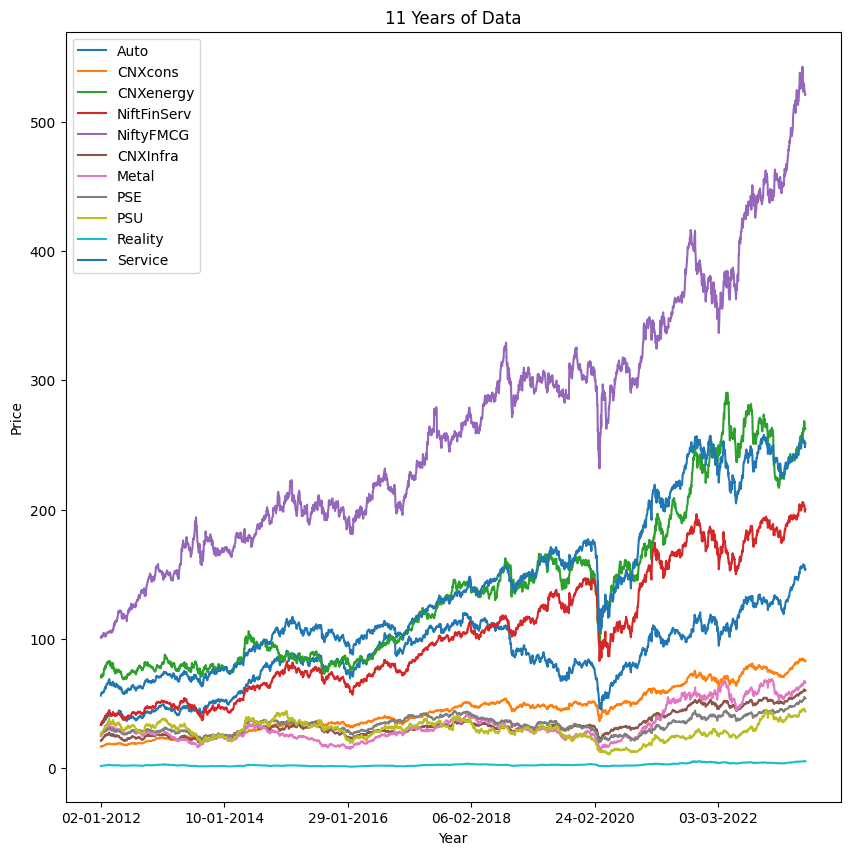

In [36]:

data.plot(figsize=(10,10))
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("11 Years of Data")
plt.show()

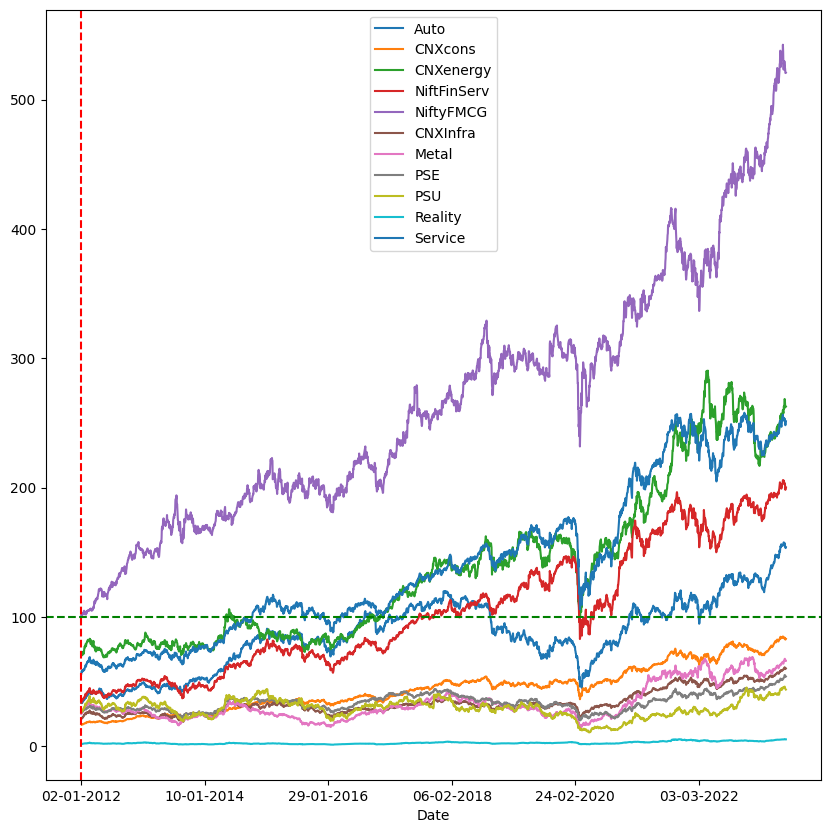

In [43]:
#Used for locating the stcoks at a particular price which can be changed by changing it in the below code
stat=data.plot(figsize=(10,10))
stat.axhline(100, color='green', linestyle='--')

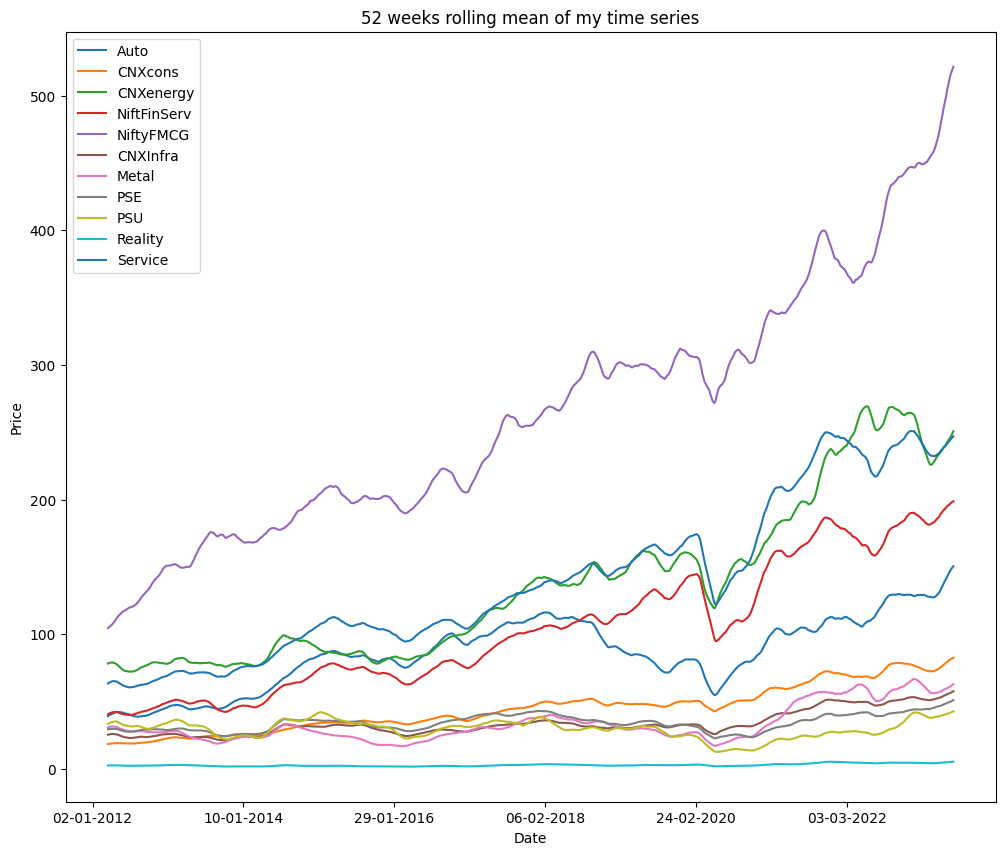

In [46]:
#Aggregates of each stock
datam = data.rolling(window=52).mean()
stats = datam.plot(figsize=(12,10))
stats.set_xlabel("Date")
stats.set_ylabel("Price")
stats.set_title("52 weeks rolling mean of my time series")
plt.show()


Text(0.5, 1.0, 'Boxplot for the price of stocks')

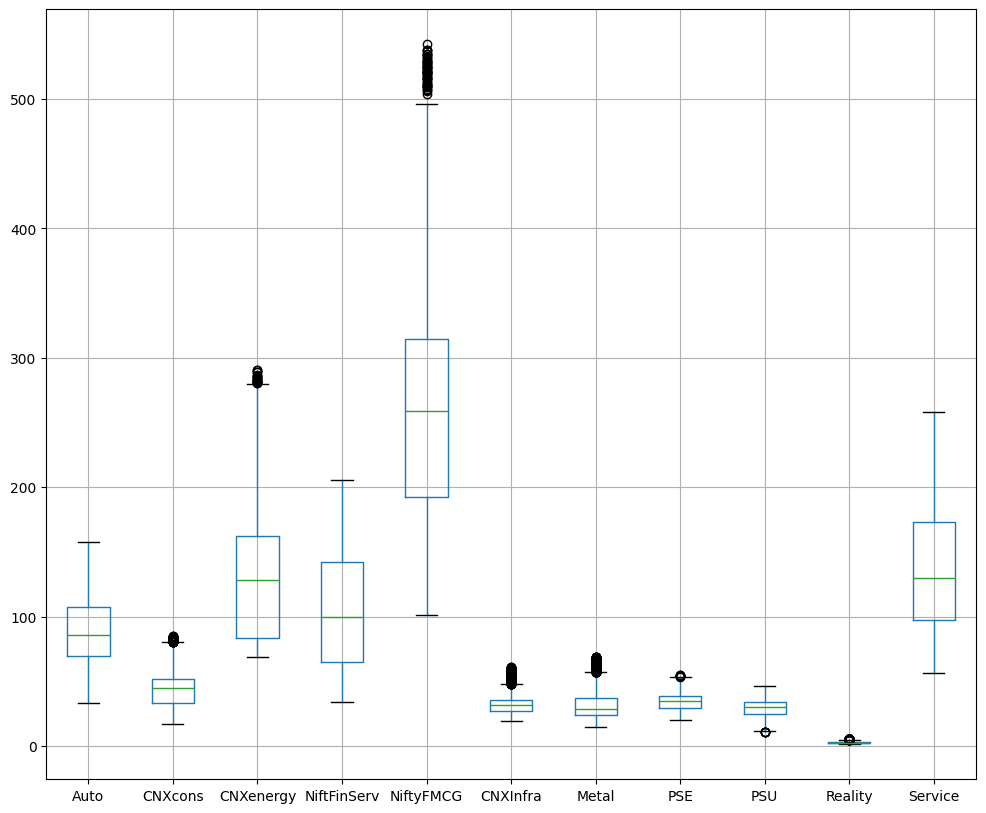

In [47]:
stats = data.boxplot(figsize=(12,10))
stat.set_ylabel('Price')
stat.set_title('Boxplot for the price of stocks')

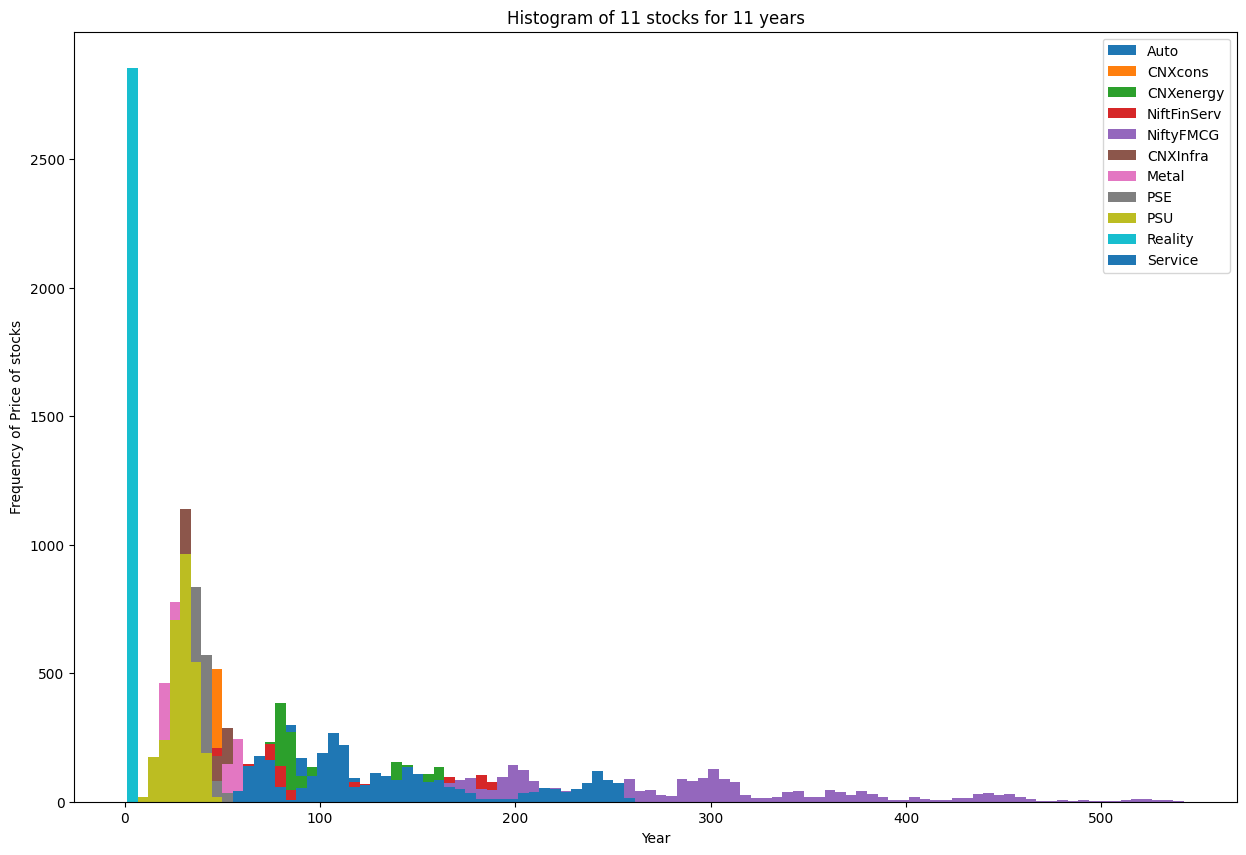

In [48]:
stat = data.plot(kind='hist', bins=100, figsize=(15,10))
stat.set_xlabel('Year')
stat.set_ylabel('Frequency of Price of stocks')
stat.set_title('Histogram of 11 stocks for 11 years')
plt.show()

In [56]:
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

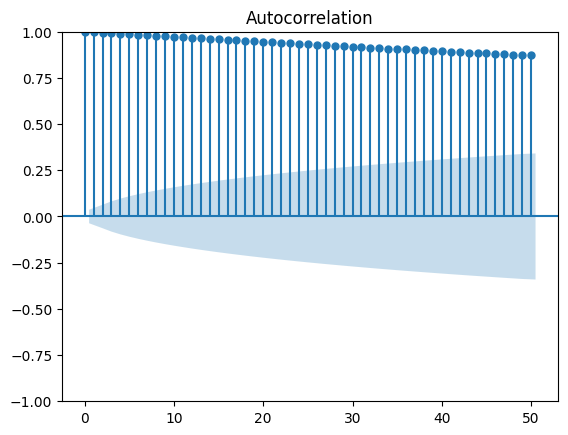

In [63]:
fig = tsaplots.plot_acf(data['Auto'], lags=50)
plt.show()

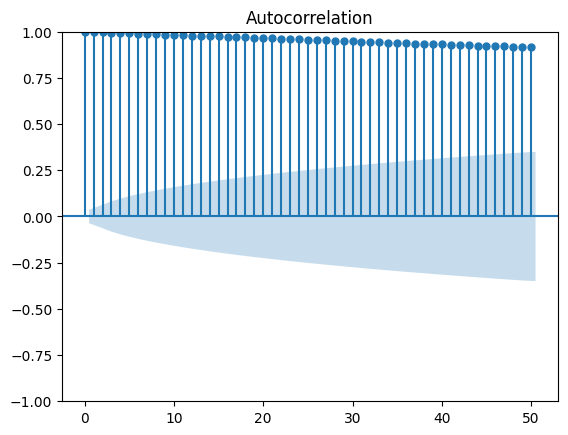

In [64]:
fig = tsaplots.plot_acf(data['CNXcons'], lags=50)
plt.show()

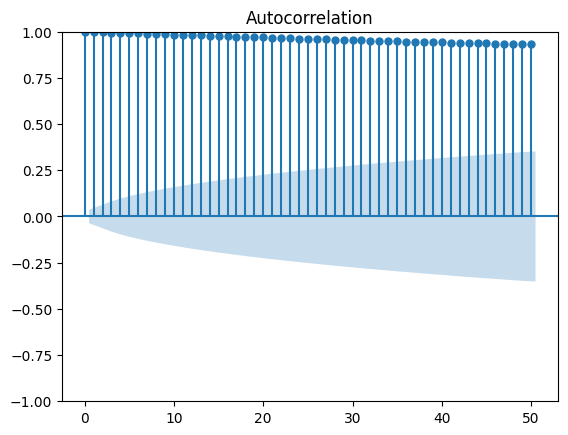

In [65]:
fig = tsaplots.plot_acf(data['CNXenergy'], lags=50)
plt.show()

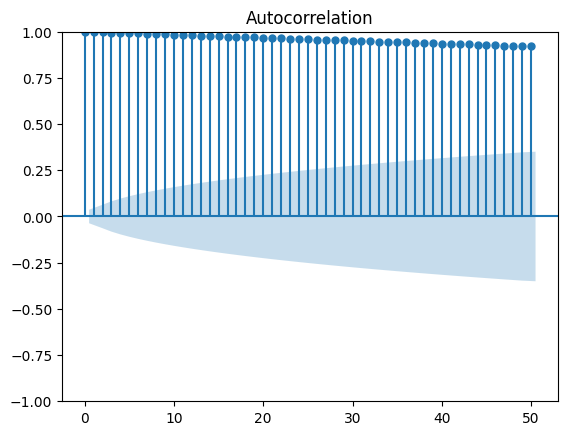

In [66]:
fig = tsaplots.plot_acf(data['NiftFinServ'], lags=50)
plt.show()

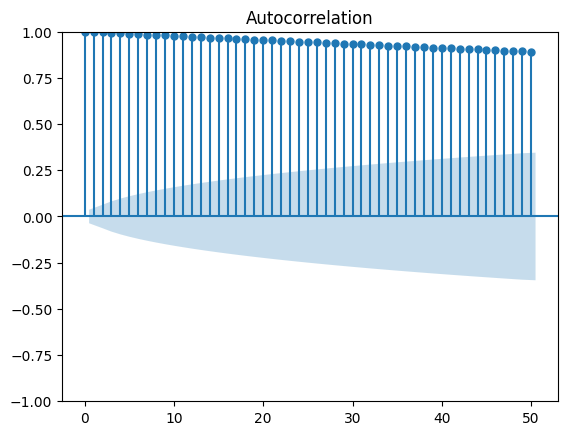

In [67]:
fig = tsaplots.plot_acf(data['NiftyFMCG'], lags=50)
plt.show()

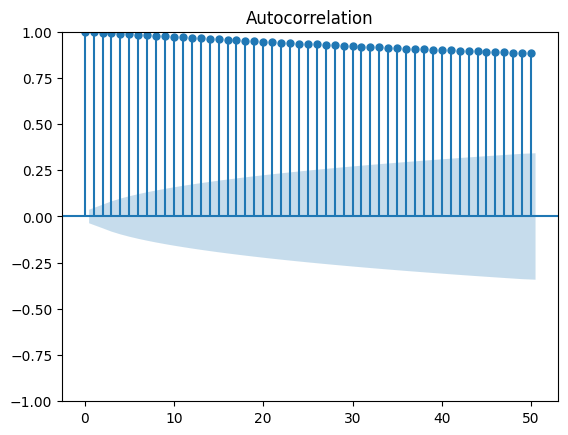

In [68]:
fig = tsaplots.plot_acf(data['CNXInfra'], lags=50)
plt.show()

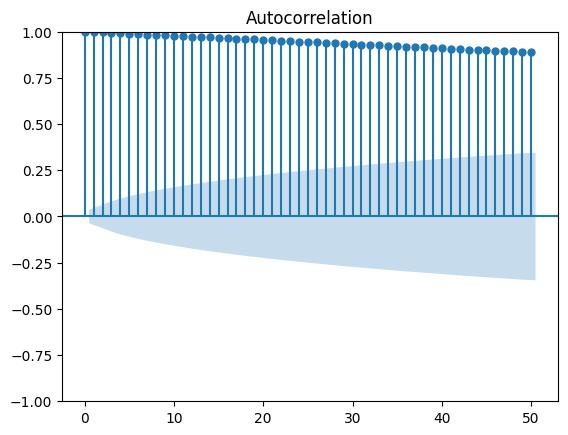

In [69]:
fig = tsaplots.plot_acf(data['Metal'], lags=50)
plt.show()

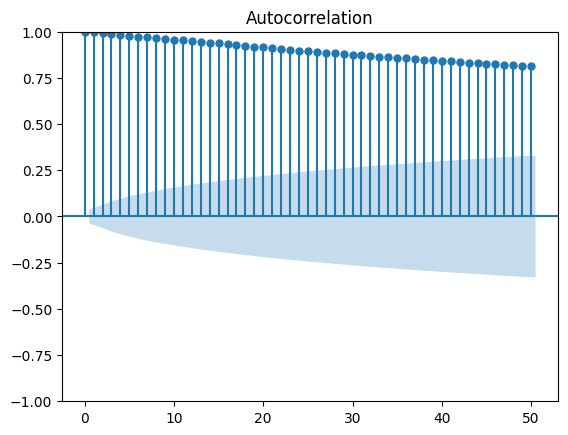

In [70]:
fig = tsaplots.plot_acf(data['PSE'], lags=50)
plt.show()

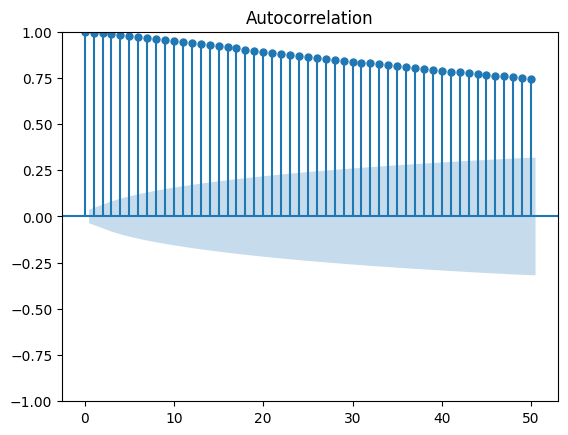

In [71]:
fig = tsaplots.plot_acf(data['PSU'], lags=50)
plt.show()

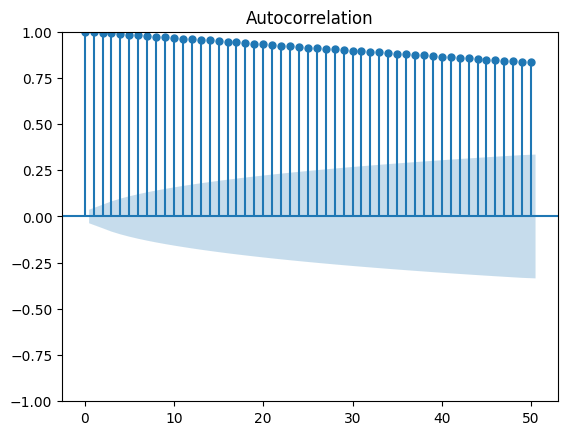

In [72]:
fig = tsaplots.plot_acf(data['Reality'], lags=50)
plt.show()

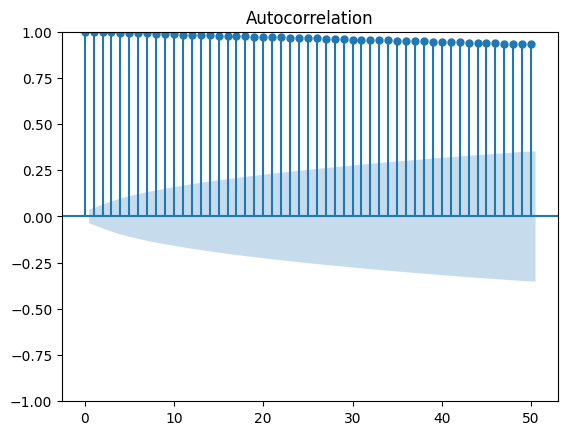

In [73]:
fig = tsaplots.plot_acf(data['Service'], lags=50)
plt.show()

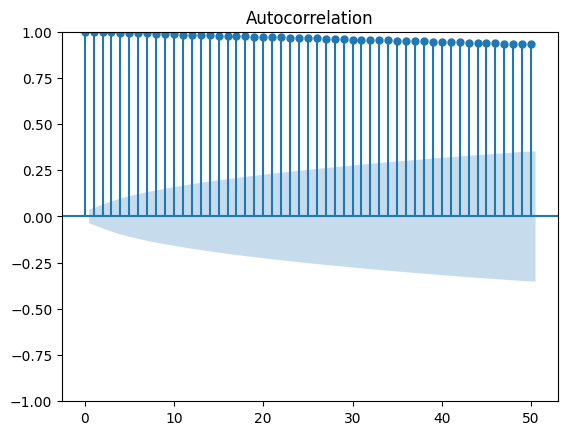

In [73]:
fig = tsaplots.plot_acf(data['Service'], lags=50)
plt.show()

Partial Autocorrelation

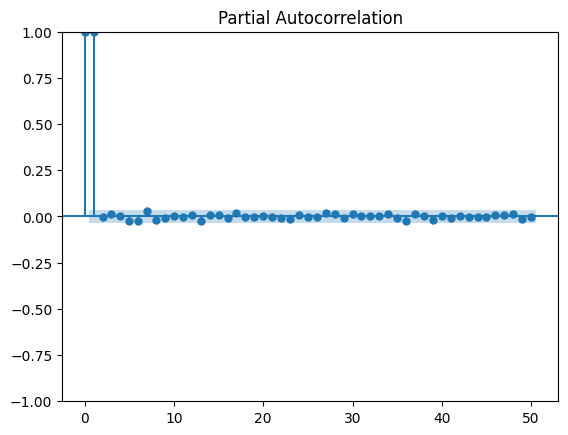

In [75]:
fig = tsaplots.plot_pacf(data['Service'], lags=50)
plt.show()

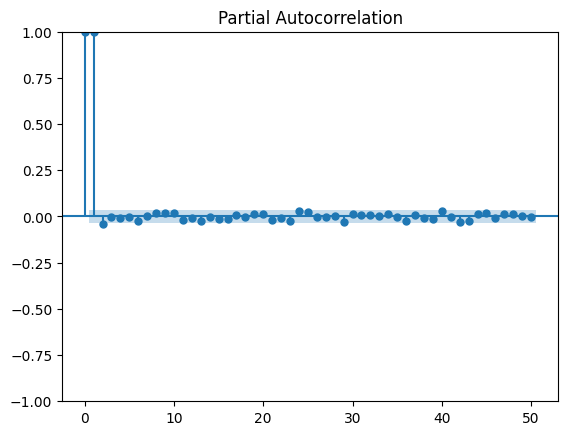

In [81]:
fig = tsaplots.plot_pacf(data['Reality'], lags=50)
plt.show()

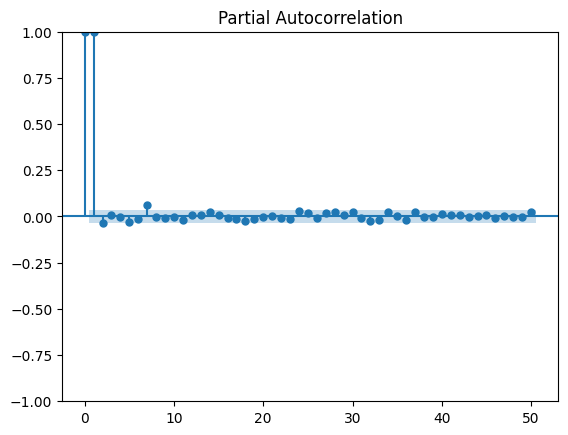

In [82]:
fig = tsaplots.plot_pacf(data['PSE'], lags=50)
plt.show()

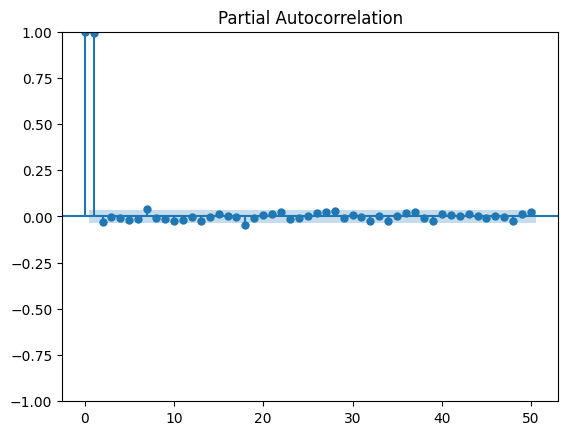

In [83]:
fig = tsaplots.plot_pacf(data['PSU'], lags=50)
plt.show()

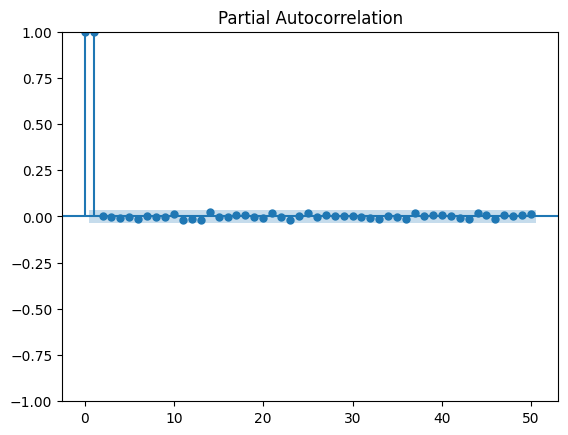

In [84]:
fig = tsaplots.plot_pacf(data['NiftyFMCG'], lags=50)
plt.show()

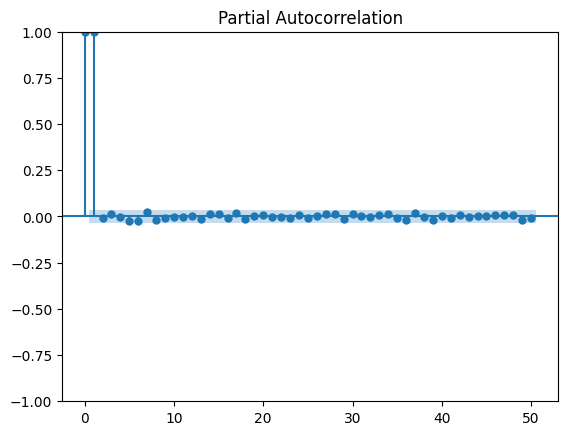

In [85]:
fig = tsaplots.plot_pacf(data['NiftFinServ'], lags=50)
plt.show()

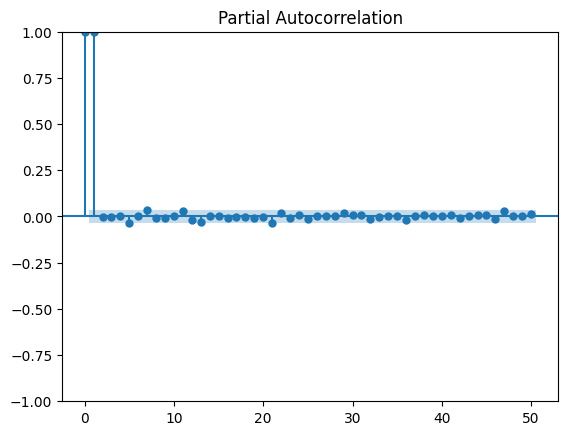

In [86]:
fig = tsaplots.plot_pacf(data['Metal'], lags=50)
plt.show()

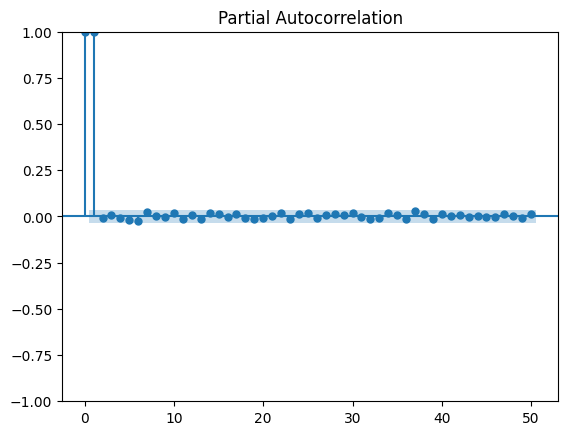

In [87]:
fig = tsaplots.plot_pacf(data['CNXInfra'], lags=50)
plt.show()

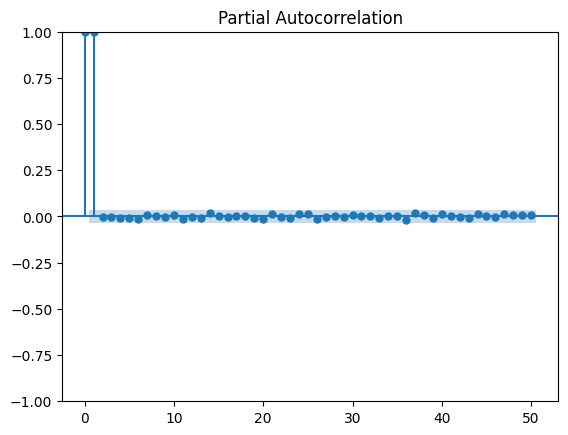

In [88]:
fig = tsaplots.plot_pacf(data['CNXcons'], lags=50)
plt.show()

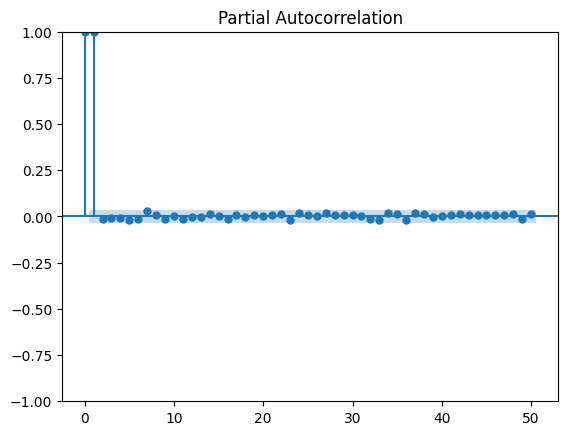

In [89]:
fig = tsaplots.plot_pacf(data['CNXenergy'], lags=50)
plt.show()

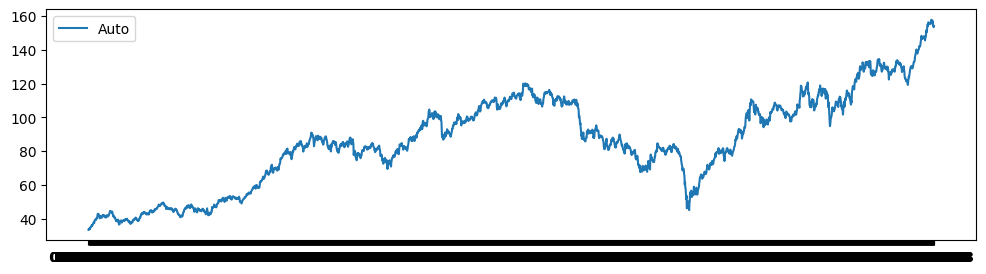

In [116]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(12, 3))
plt.plot(data['Auto'], label='Auto')
plt.legend()

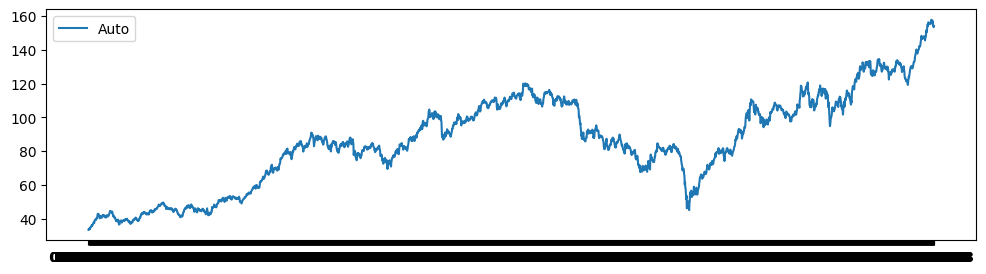

In [116]:
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(12, 3))
plt.plot(data['Auto'], label='Auto')
plt.legend()

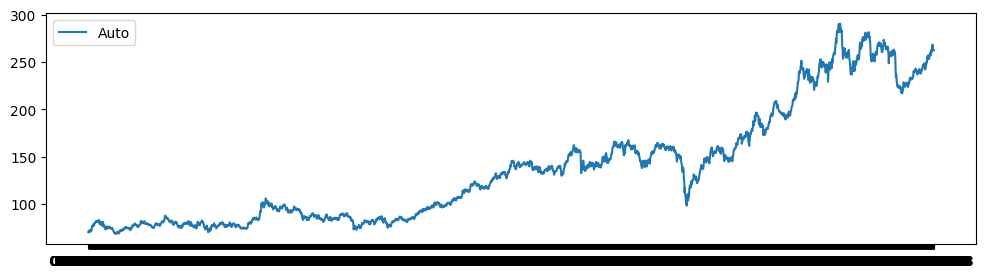

In [117]:
plt.figure(figsize=(12, 3))
plt.plot(data['CNXenergy'], label='CNXenergy')
plt.legend()

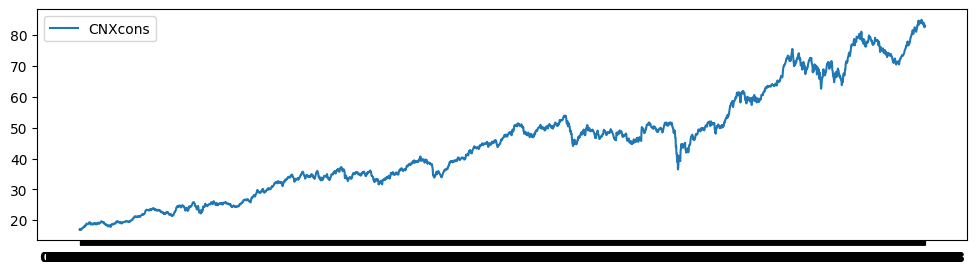

In [118]:
plt.figure(figsize=(12, 3))
plt.plot(data['CNXcons'], label='CNXcons')
plt.legend()

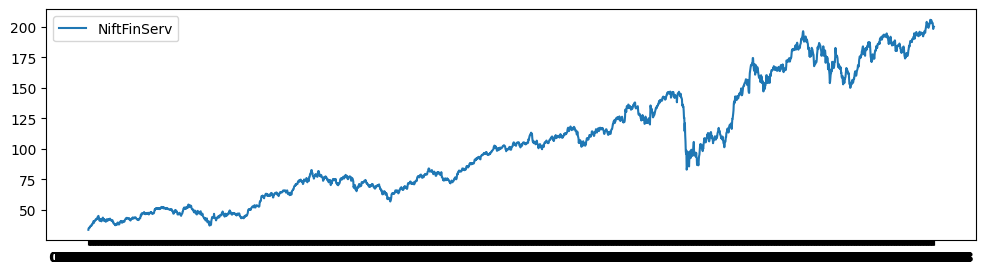

In [119]:
plt.figure(figsize=(12, 3))
plt.plot(data['NiftFinServ'], label='NiftFinServ')
plt.legend()

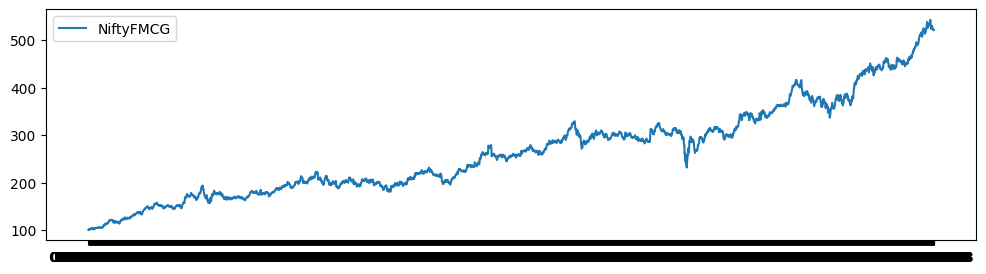

In [121]:
plt.figure(figsize=(12, 3))
plt.plot(data['NiftyFMCG'], label='NiftyFMCG')
plt.legend()

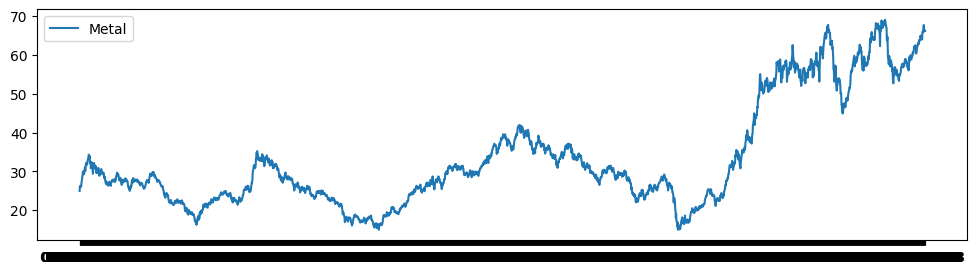

In [122]:
plt.figure(figsize=(12, 3))
plt.plot(data['Metal'], label='Metal')
plt.legend()

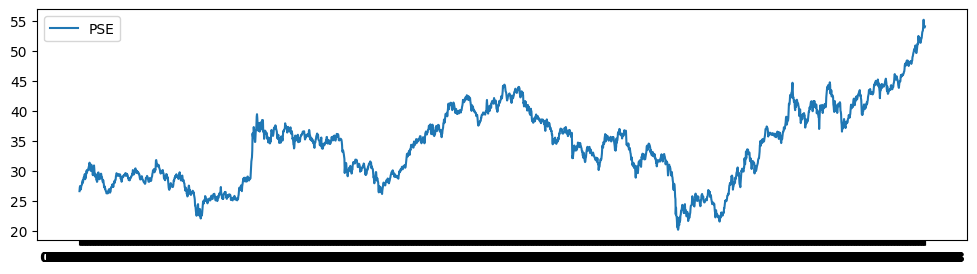

In [123]:
plt.figure(figsize=(12, 3))
plt.plot(data['PSE'], label='PSE')
plt.legend()

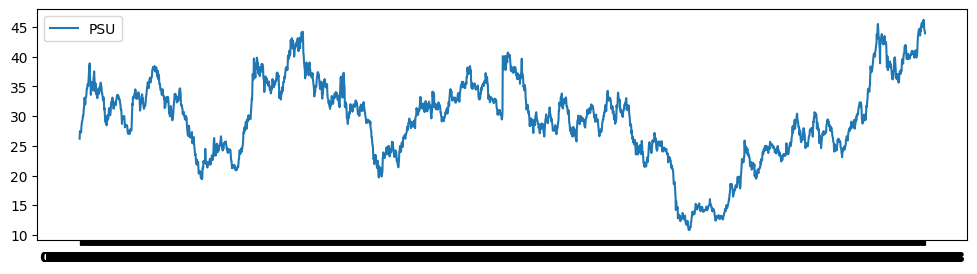

In [124]:
plt.figure(figsize=(12, 3))
plt.plot(data['PSU'], label='PSU')
plt.legend()

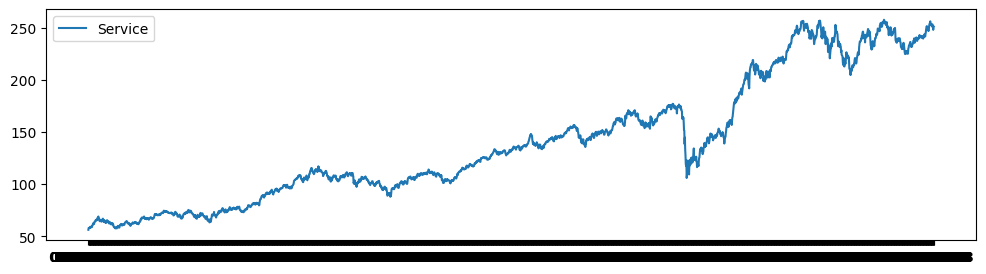

In [125]:
plt.figure(figsize=(12, 3))
plt.plot(data['Service'], label='Service')
plt.legend()

In [134]:
#sample moving average
sma_window = 10
sma = data.rolling(window=sma_window).mean()
sma

,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
Date,,,,,,,,,,,
02-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
01-08-2023,156.647214,83.879572,263.272712,204.174431,526.506998,60.208714,66.192642,53.780070,45.793786,5.503929,252.912785
02-08-2023,156.377715,83.757072,264.133354,203.551858,525.931283,60.293785,66.532500,53.962071,45.661572,5.520000,252.552500
03-08-2023,155.826572,83.577358,264.337782,202.555215,525.569001,60.329784,66.559000,54.079643,45.587500,5.525214,251.795215


In [131]:
#exponential moving average   
ema_window = 100
ema = data.ewm(span=ema_window, adjust=False).mean()
ema

,Auto,CNXcons,CNXenergy,NiftFinServ,NiftyFMCG,CNXInfra,Metal,PSE,PSU,Reality,Service
Date,,,,,,,,,,,
02-01-2012,33.561001,16.931000,70.370498,33.699399,101.039502,21.262000,24.951001,26.556499,26.193999,1.831000,56.292998
03-01-2012,33.598388,16.947690,70.473756,33.780458,101.111599,21.314774,25.030711,26.596370,26.275967,1.836387,56.408095
04-01-2012,33.615331,16.947652,70.550127,33.868035,101.137625,21.361111,25.110439,26.649411,26.352550,1.841007,56.511863
05-01-2012,33.657406,16.950352,70.549732,33.974619,101.148616,21.410330,25.174346,26.677965,26.426579,1.843039,56.618808
06-01-2012,33.689832,16.948910,70.588201,34.078192,101.207899,21.439083,25.228872,26.687257,26.485090,1.844037,56.710885
...,...,...,...,...,...,...,...,...,...,...,...
01-08-2023,153.183692,83.235008,255.657383,201.309141,525.513922,58.582703,64.081654,51.953665,44.042379,5.316836,249.855186
02-08-2023,153.255003,83.228136,256.164874,201.267873,525.396055,58.672238,64.226999,52.082590,44.088967,5.327621,249.882207
03-08-2023,153.290035,83.184256,256.555430,201.077977,525.088149,58.740674,64.342806,52.198294,44.115647,5.331419,249.777581


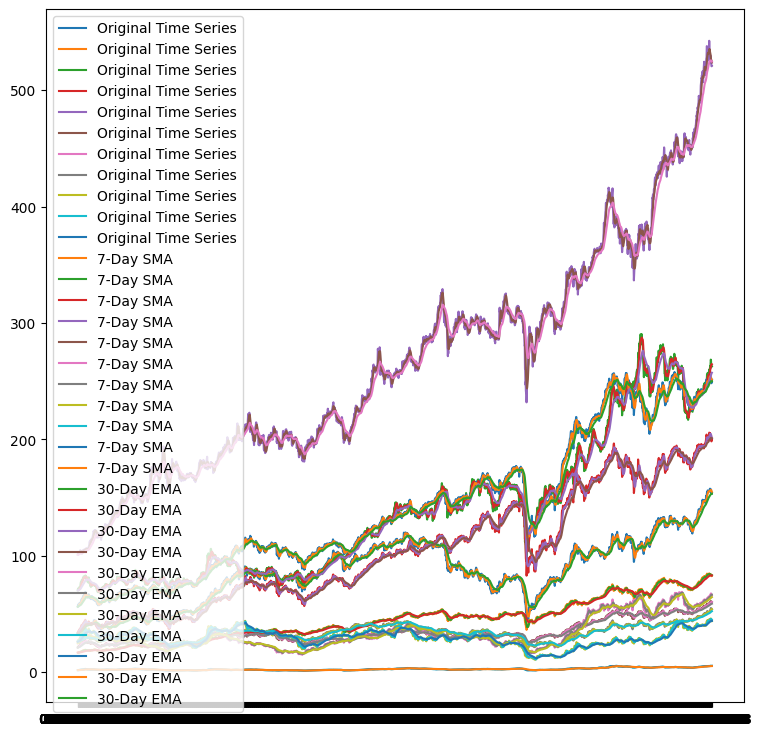

In [135]:
plt.figure(figsize=(9, 9))
plt.plot(data, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()